In [66]:
# Importing necessary libraries for data manipulation and linear algebra
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

# Importing libraries for data visualization
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical data visualization

# Importing machine learning libraries
from sklearn.model_selection import train_test_split # Splitting the dataset into training and testing sets
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors algorithm
from sklearn.linear_model import LogisticRegression # Logistic Regression algorithm
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

# Suppressing warnings for cleaner output
import warnings as wrn
wrn.filterwarnings('ignore')

# Importing Plotly for interactive plotting
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) # Initializing Plotly for offline mode in Jupyter notebooks
import plotly.graph_objs as go # Graph objects in Plotly
import plotly.express as px # Express module for easy plotting in Plotly

# Importing additional machine learning libraries
from sklearn.preprocessing import StandardScaler # Standardizing features by removing the mean and scaling to unit variance
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier

# Re-importing seaborn and matplotlib for potential additional visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Importing metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [67]:
data = pd.read_csv('Iris.csv')

In [68]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [70]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

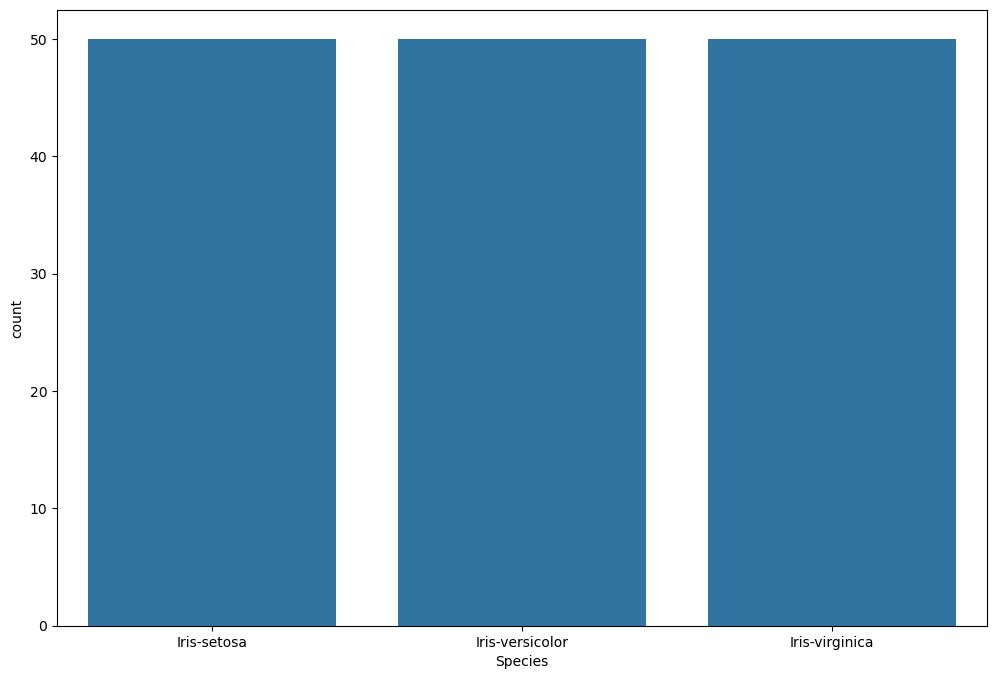

In [72]:
# Create a new figure and axis object for plotting with a size of 12x8 inches
fig, ax = plt.subplots(figsize=(12, 8))

# Use Seaborn's countplot function to plot the counts of observations in the 'Legendary' column of the 'data' DataFrame
# The 'x' parameter specifies the column to plot on the x-axis
# 'data' specifies the DataFrame to use
# 'ax' parameter specifies the axis object to plot on
sns.countplot(x='Species', data=data, ax=ax)

# Display the plot
plt.show()


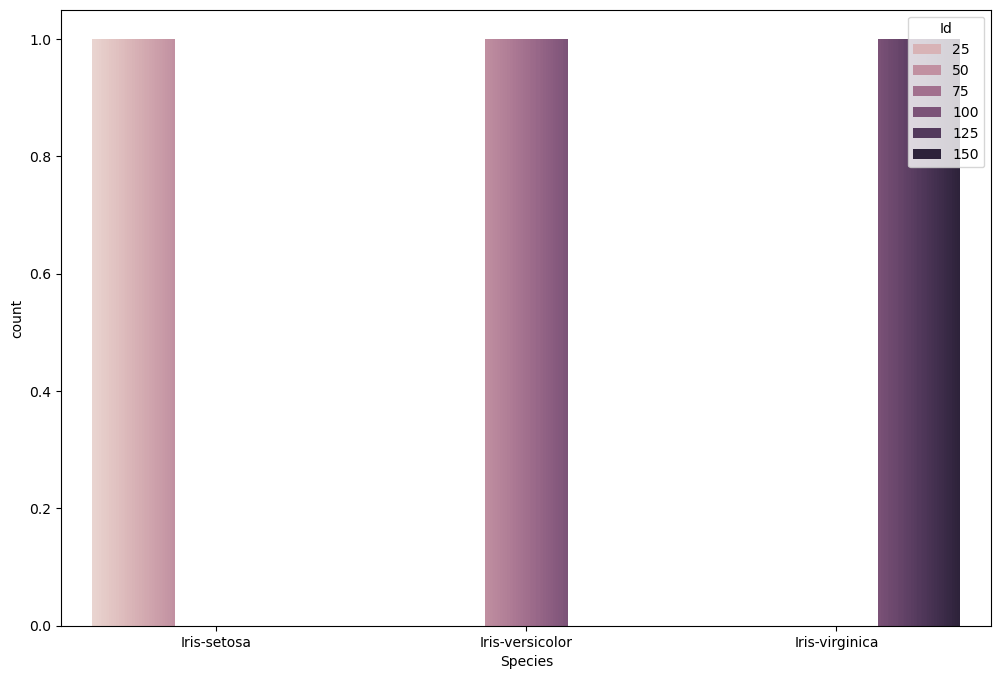

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=data.Species, hue=data["Id"], ax=ax)
plt.show()

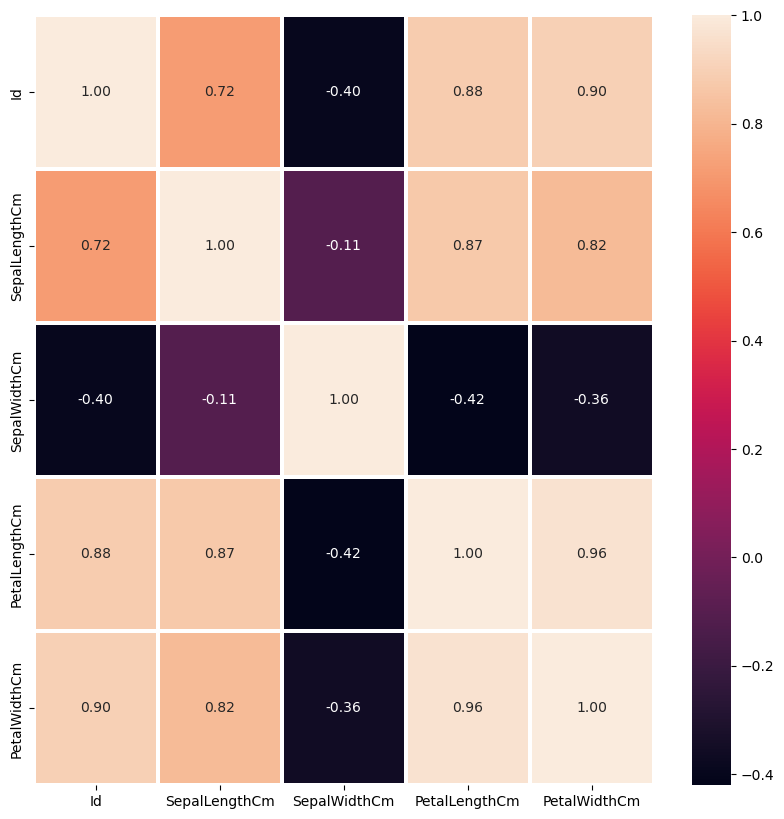

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", linewidths=1.5, ax=ax)
plt.show()

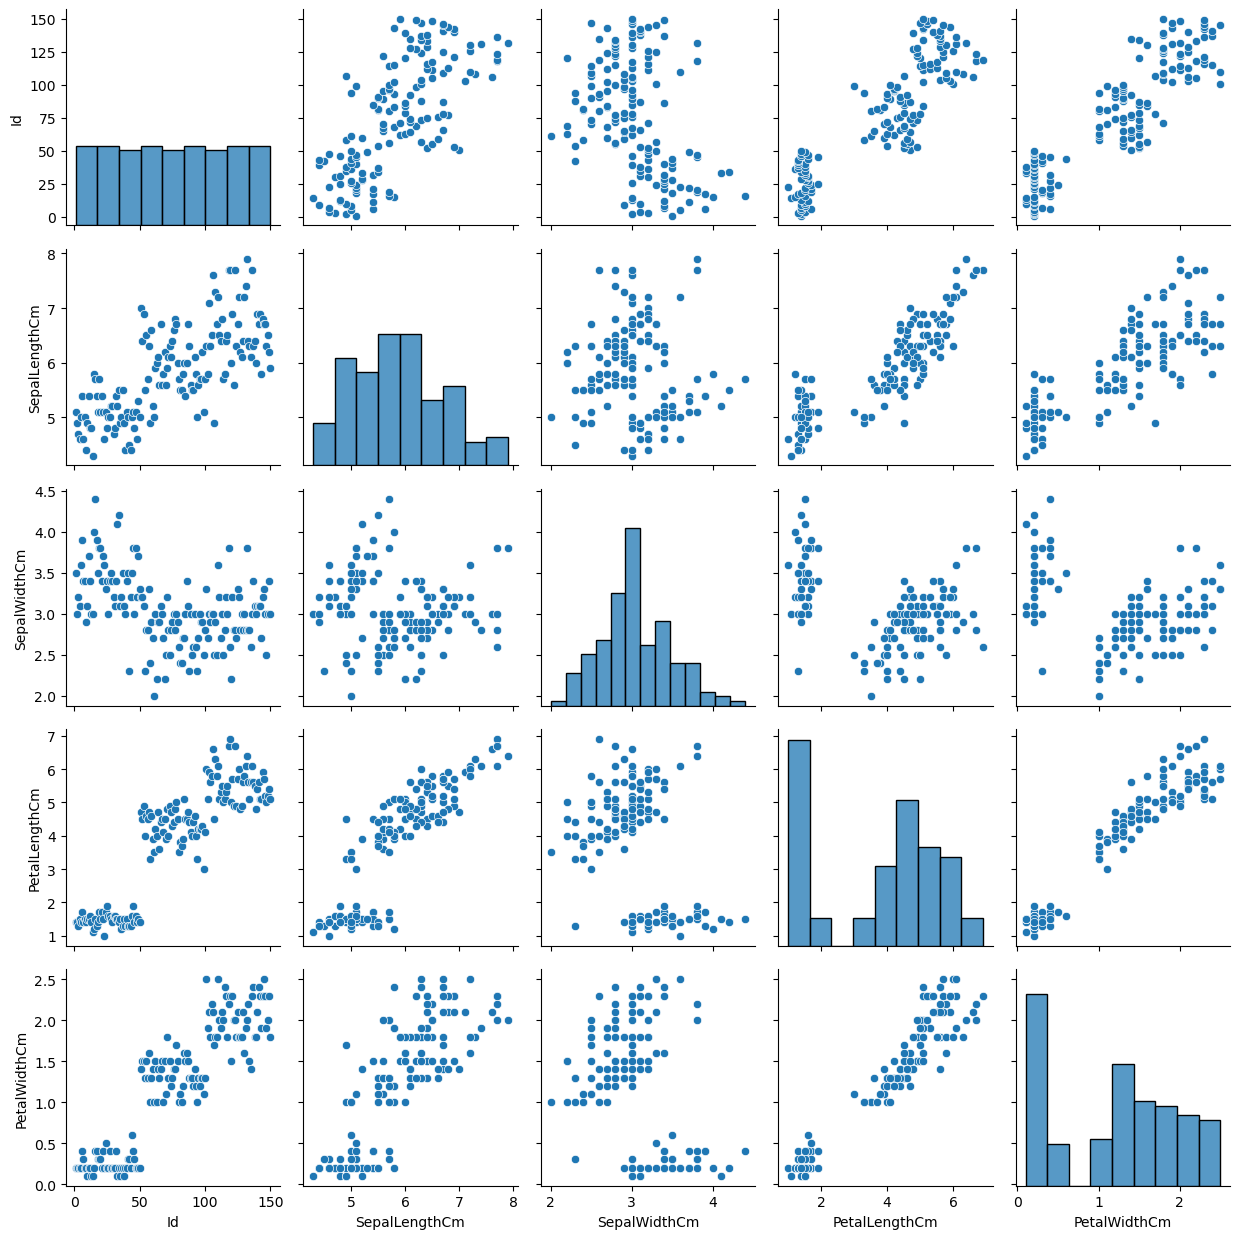

In [75]:
sns.pairplot(data)
plt.tight_layout()  # Ensure tight layout
plt.show()

In [76]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])
data.Species = data.Species.astype(int)

In [78]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [79]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [80]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [85]:
iris = load_iris()
X, y = iris.data, iris.target
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [86]:
predictions = {}
predictions_proba = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
    else:
        y_pred_prob = None
    
    predictions[name] = y_pred
    predictions_proba[name] = y_pred_prob


Model: Logistic Regression
Accuracy: 0.93
Precision (macro): 0.93
Recall (macro): 0.93
F1-Score (macro): 0.93
AUC: 0.9966666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



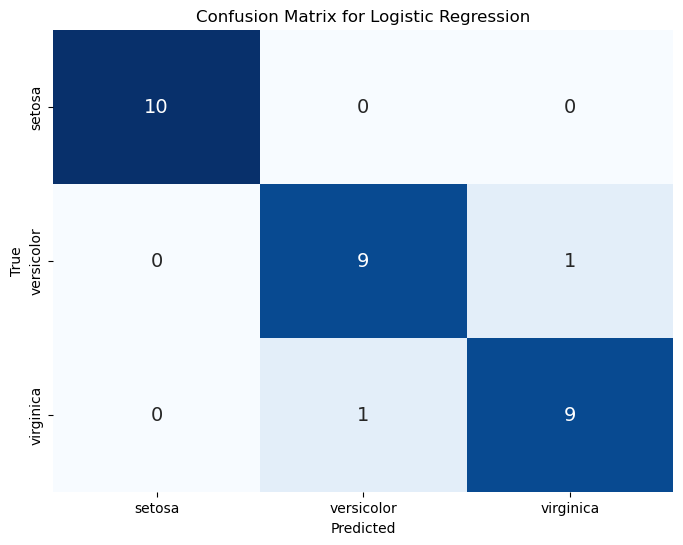

Model: K-Nearest Neighbors
Accuracy: 0.93
Precision (macro): 0.94
Recall (macro): 0.93
F1-Score (macro): 0.93
AUC: 0.9933333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



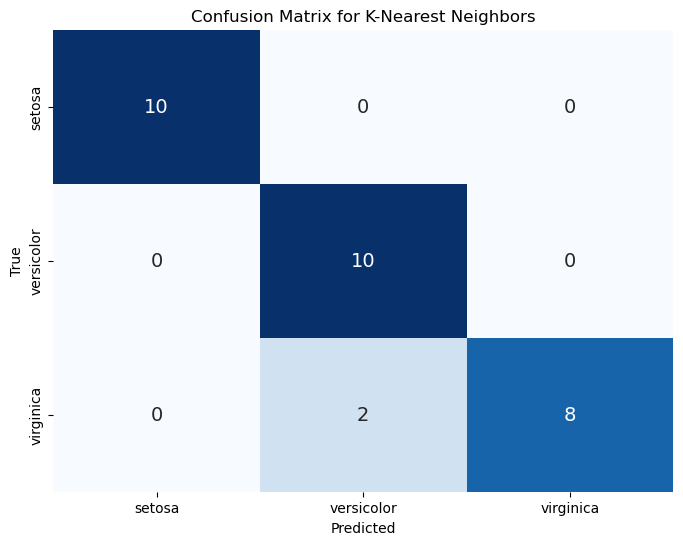

Model: Support Vector Machine
Accuracy: 0.97
Precision (macro): 0.97
Recall (macro): 0.97
F1-Score (macro): 0.97
AUC: 0.9966666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



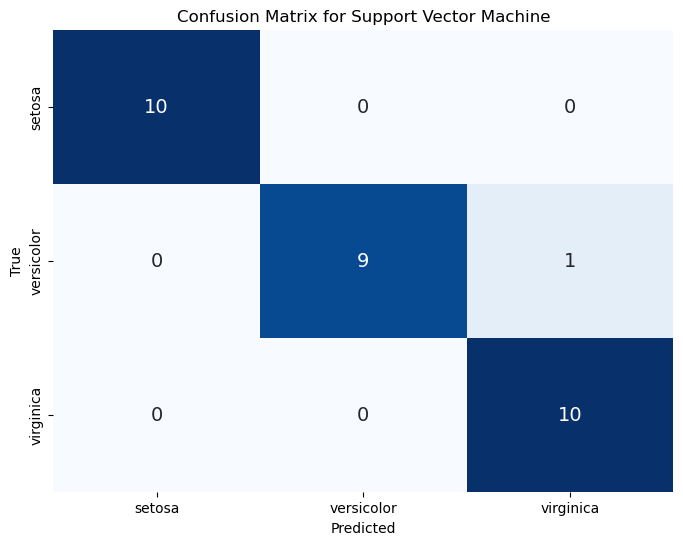

Model: Decision Tree
Accuracy: 0.93
Precision (macro): 0.93
Recall (macro): 0.93
F1-Score (macro): 0.93
AUC: 0.9499999999999998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



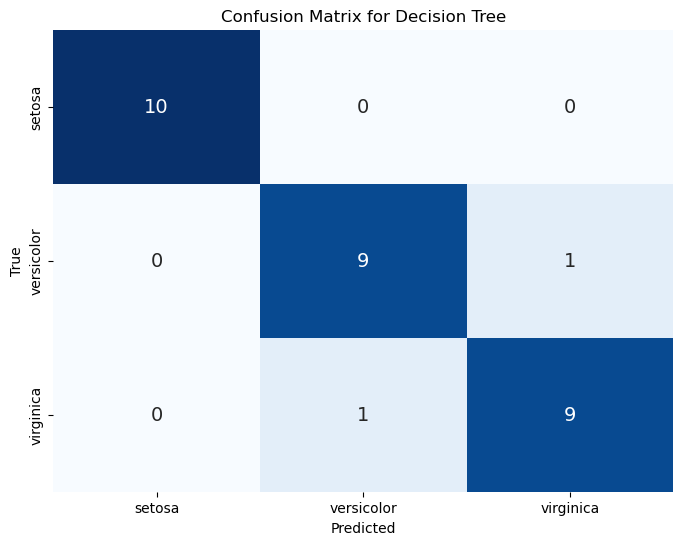

Model: Random Forest
Accuracy: 0.93
Precision (macro): 0.93
Recall (macro): 0.93
F1-Score (macro): 0.93
AUC: 0.9933333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



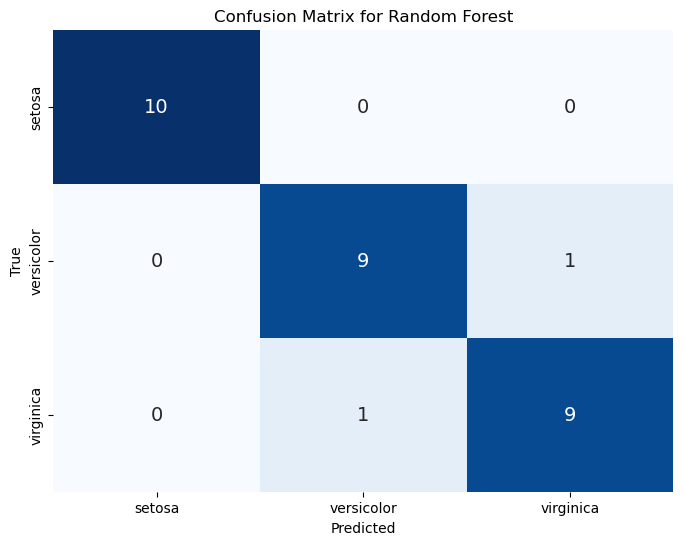

In [89]:
from sklearn.preprocessing import label_binarize

results = []

for name in models.keys():
    y_pred = predictions[name]
    y_pred_prob = predictions_proba[name]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    if y_pred_prob is not None:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        try:
            auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
        except Exception:
            auc = float('nan')
    else:
        auc = float('nan')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    results_df = pd.DataFrame(results)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision (macro): {precision:.2f}")
    print(f"Recall (macro): {recall:.2f}")
    print(f"F1-Score (macro): {f1:.2f}")
    print(f"AUC: {auc if not np.isnan(auc) else 'N/A'}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=np.arange(len(iris.target_names))+0.5, labels=iris.target_names)
    plt.yticks(ticks=np.arange(len(iris.target_names))+0.5, labels=iris.target_names)
    plt.show()


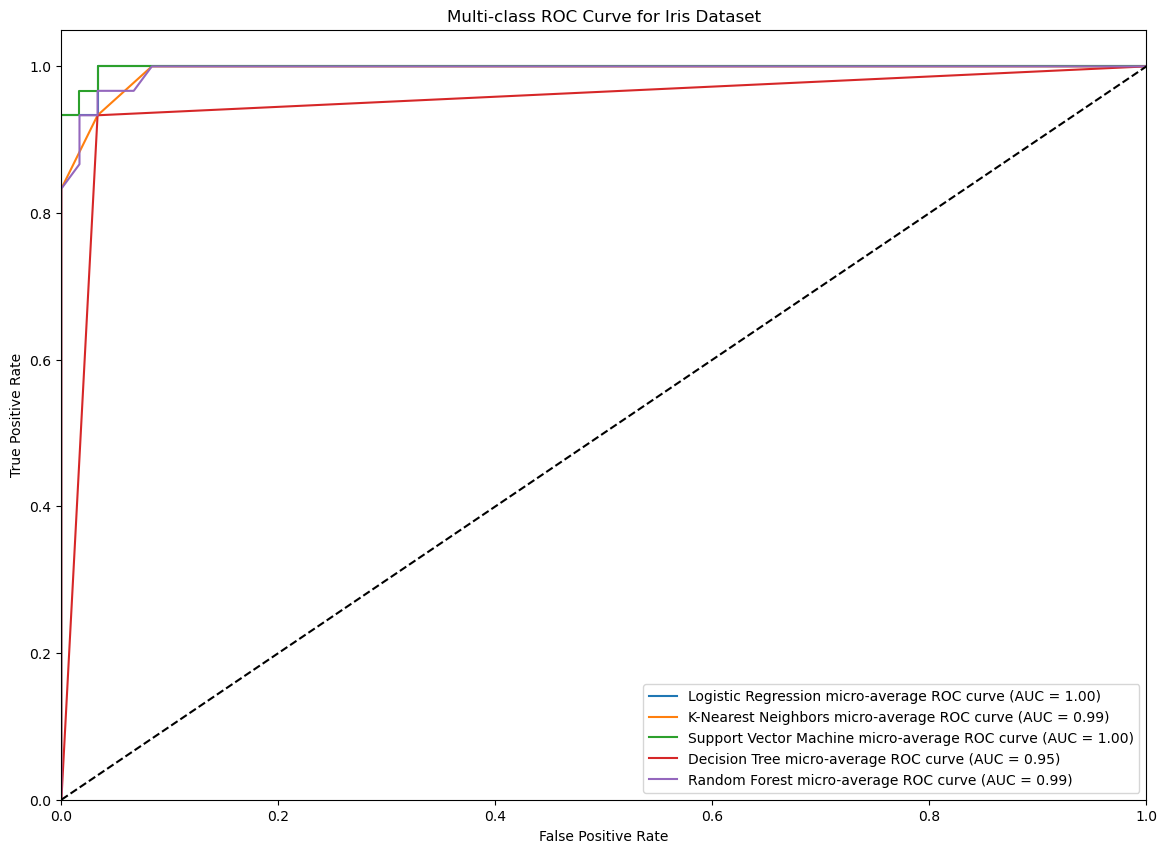

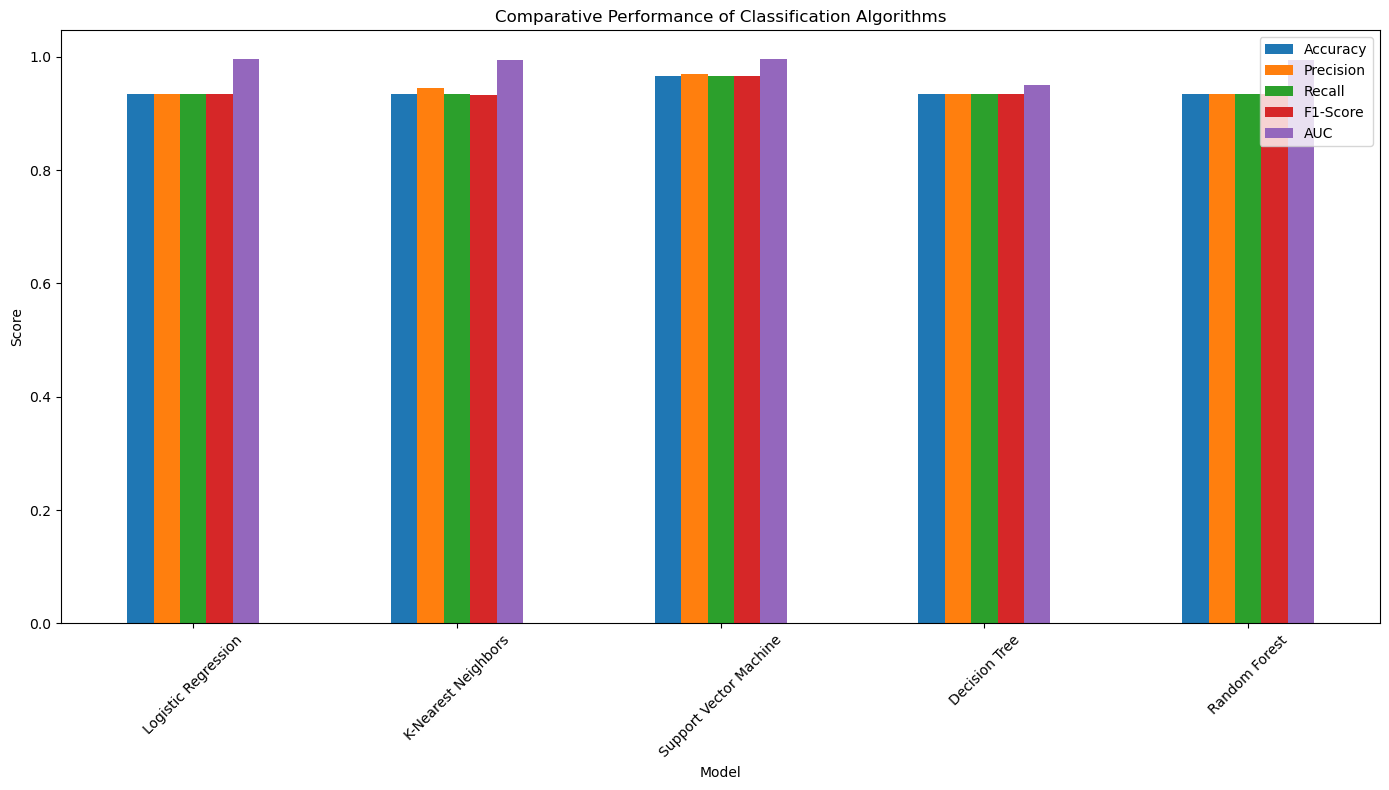

In [90]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize test labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(14, 10))

for name in models.keys():
    y_pred_prob = predictions_proba[name]
    if y_pred_prob is None:
        print(f"{name} does not support predict_proba, skipping ROC curve.")
        continue
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot micro-average ROC curve for this model
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{name} micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')

# Plot random guessing diagonal
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for Iris Dataset')
plt.legend(loc="lower right")
plt.show()


# Bar plot for comparative performance metrics
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparative Performance of Classification Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
